### PROBLEM DEFINITION

### Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster,  Can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

## BackGround


### - On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.

### -One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.

### -Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

# Import Libraries

In [1]:
#Data Wrangling and Visualization 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier



#### Acquire The DataSets

In [2]:
test_df=pd.read_csv('./kaggle-titanic-master/input/test.csv')
train_df=pd.read_csv('./kaggle-titanic-master/input/train.csv')

## DATA ANALYSIS

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary

* Survived: 0 = No, 1 = Yes
* pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
* sibsp: # of siblings / spouses aboard the Titanic
* parch: # of parents / children aboard the Titanic
* ticket: Ticket number
* cabin: Cabin number
* embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
train_df.shape

(891, 12)

In [5]:
test_df.shape

(418, 11)

In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


##### Age,cabin and embarked  have missing values

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


##### Age,Fare and Cabin have missing values

In [9]:
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
print(train_df.describe(include=['O']))
test_df.describe(include=['O'])

                      Name   Sex    Ticket Cabin Embarked
count                  891   891       891   204      889
unique                 891     2       681   147        3
top     Bourke, Miss. Mary  male  CA. 2343    G6        S
freq                     1   577         7     4      644


,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Willer, Mr. Aaron (Abi Weller"")""",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


### Visualization

In [12]:
def bar_chart(feature):
    survived = train_df[train_df['Survived']==1][feature].value_counts()
    dead = train_df[train_df['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', figsize=(10,5))

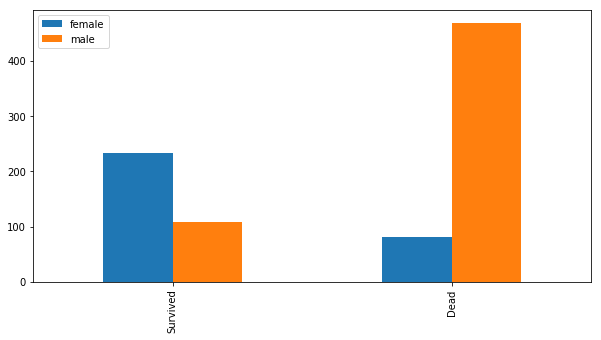

In [13]:
bar_chart('Sex')

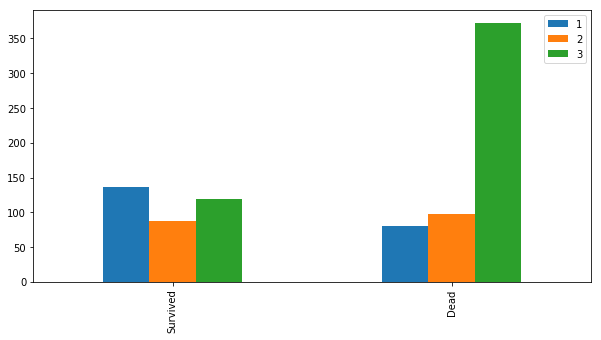

In [14]:
bar_chart('Pclass')

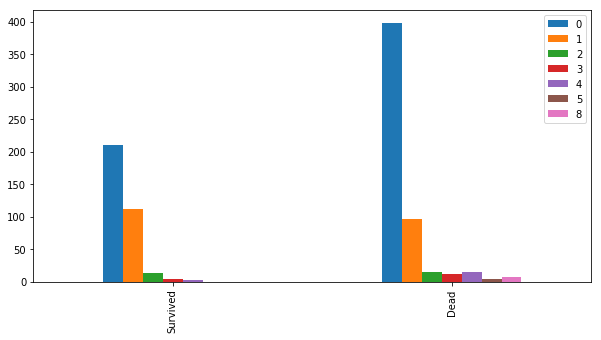

In [15]:
bar_chart('SibSp')

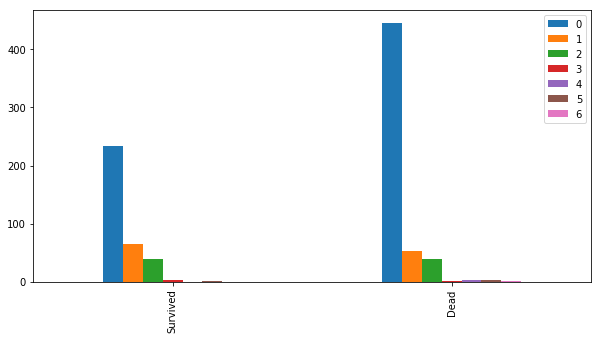

In [16]:
bar_chart('Parch')

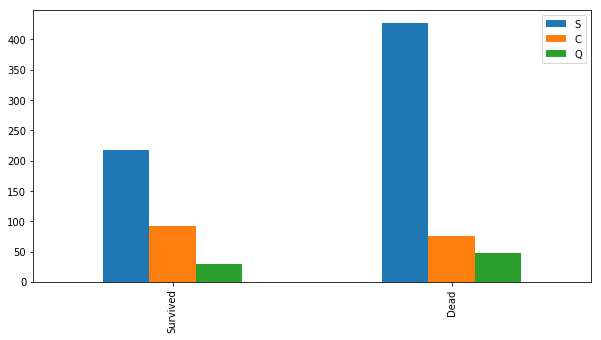

In [17]:
bar_chart('Embarked')

### DATA WRANGLING

Correlation Anaysis

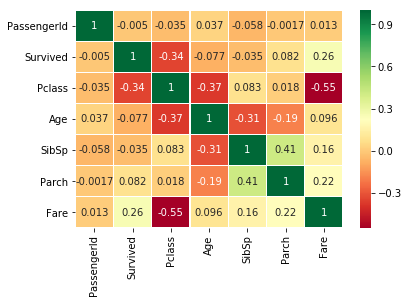

In [18]:
sns.heatmap(train_df.corr(), annot=True, cmap='RdYlGn', linewidth=0.4)

In [19]:
def impute(feature):
    dfs=[train_df,test_df]
    for df in dfs:
           df[feature][df[feature].isnull()]=np.random.normal(df[feature].mean(),df[feature].std())
def Drop_feature(feature):
    dfs=[train_df,test_df]
    for df in dfs:
        df.drop(feature,axis=1,inplace=True)

Utility Functions to impute and drop features

In [20]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Decription of the numerical features

In [21]:
train_df.describe(include ='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Bourke, Miss. Mary",male,CA. 2343,G6,S
freq,1,577,7,4,644


Description of the object features

In [22]:
impute('Fare')
impute('Age')
Drop_feature('Name')
Drop_feature('Cabin')
Drop_feature('Ticket')


In [23]:
dfs=[train_df,test_df]

Gender={"male":0 ,"female":1}
Towns={"S":1, "Q":2 ,"C":3}
for df in dfs:
    df.Age=df.Age.astype(int)
    df["Sex"]=df["Sex"].map(Gender)
    df["Embarked"]=df["Embarked"].map(Towns)
    df.loc[df['Age']<=15,'Age']=0
    df.loc[(df['Age']>15) & (df.Age<=30),'Age']=1
    df.loc[(df['Age']>30) & (df.Age<=45),'Age']=2
    df.loc[(df['Age']>45) & (df.Age<=60),'Age']=3
    df.loc[df['Age']>45,'Age']=4


Transform Categorical features to discrete feature

In [24]:
impute('Embarked')

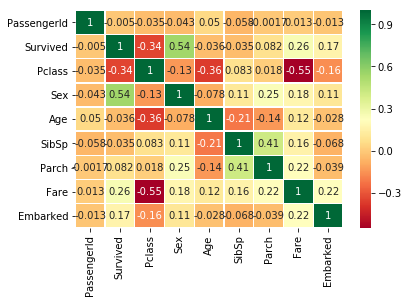

In [25]:
sns.heatmap(train_df.corr(), annot=True, cmap='RdYlGn', linewidth=0.4)

In [26]:
corr_ds=train_df.corr()